In [53]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import os
import warnings
from sklearn.cluster import KMeans

In [55]:
# Cargar el dataset
df = pd.read_csv("Mall_Customers.csv")

In [57]:
# Análisis Exploratorio de Datos (EDA)
# 1. Visualizar las primeras filas del dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [59]:
# 2. Estadísticas básicas
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [61]:
# 3. Revisar valores faltantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [63]:
# 4. Distribución de variables categóricas
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


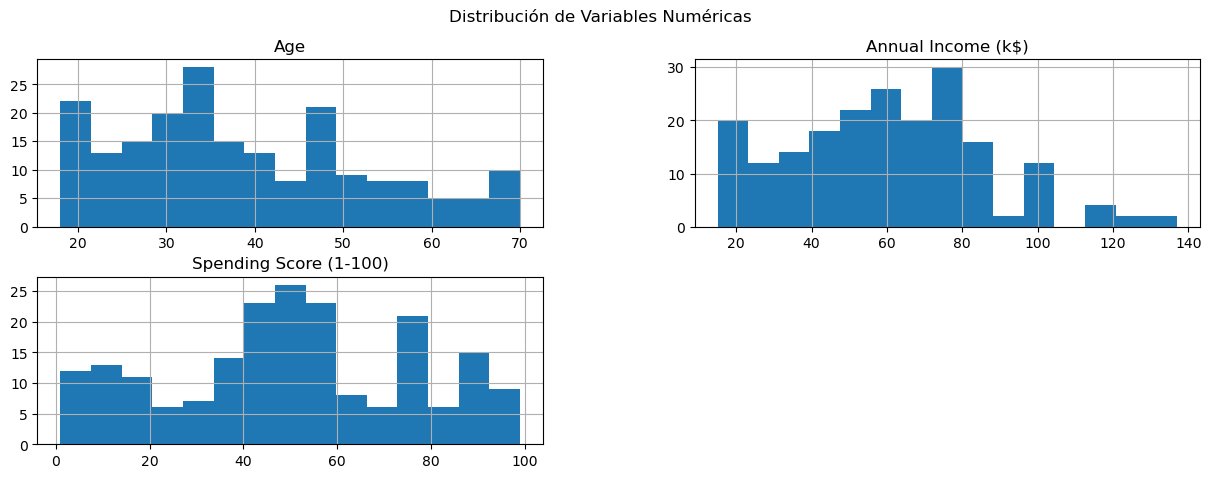

In [65]:
# Distribuciones y Tendencias
# 1. Histogramas
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(15, 5))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

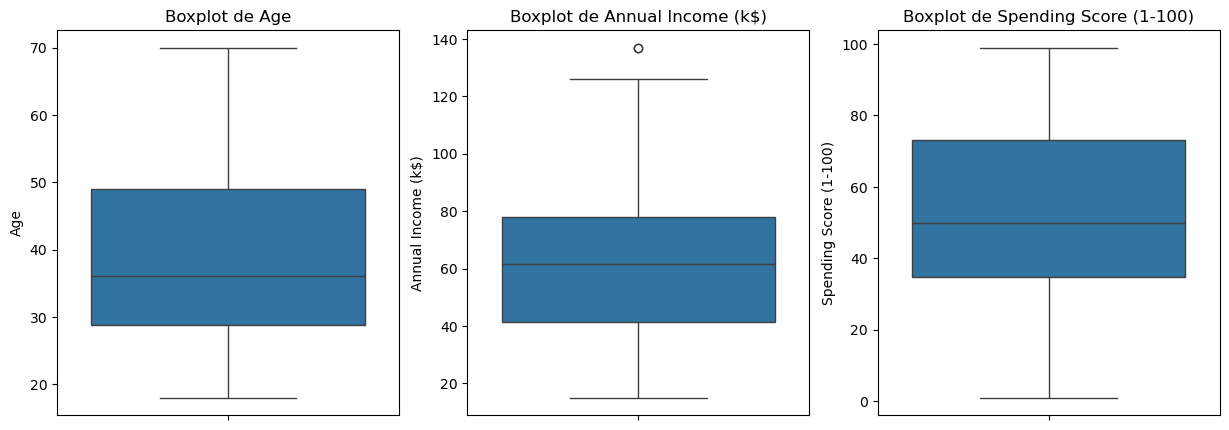

In [66]:
# 2. Diagramas de caja (boxplots)
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.show()

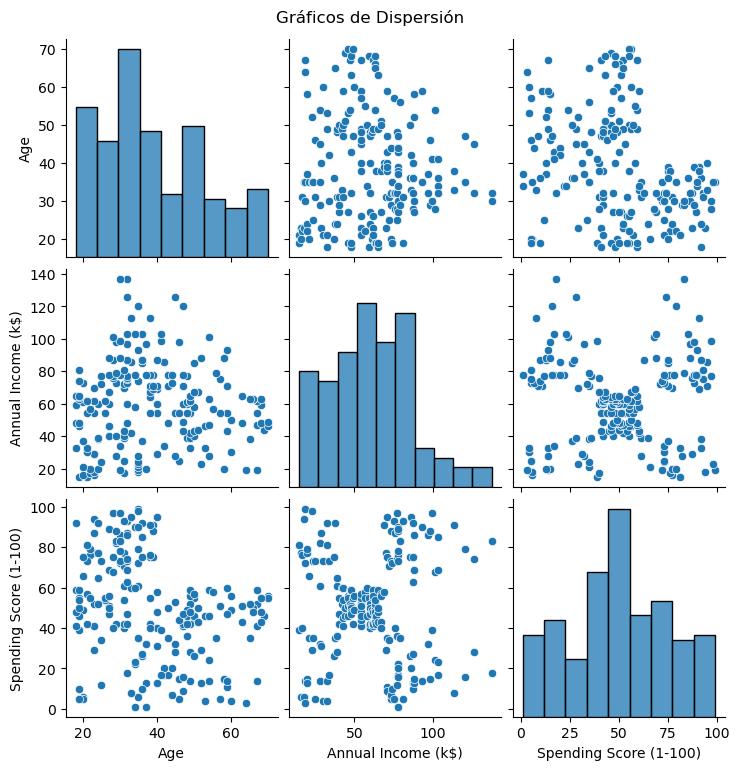

In [69]:
# 3. Gráficos de dispersión (scatter plots)
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Gráficos de Dispersión", y=1.02)
plt.show()

In [77]:
# Filtrar las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Imputar valores faltantes solo en columnas numéricas
df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())


In [79]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [81]:
# 2. Normalización o Escalado
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [83]:
# Selección de Características
# 1. Reducción de Dimensionalidad con PCA
pca = PCA(n_components=2)  # Elegimos 2 componentes principales para visualización
pca_features = pca.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_pca = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])

In [87]:


# Desactivar las advertencias específicas de KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

os.environ["OMP_NUM_THREADS"] = "1"

# Entrenamiento del Modelo con K-means
# 1. Definir el Número de Clusters utilizando el método del codo (Elbow Method)
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)


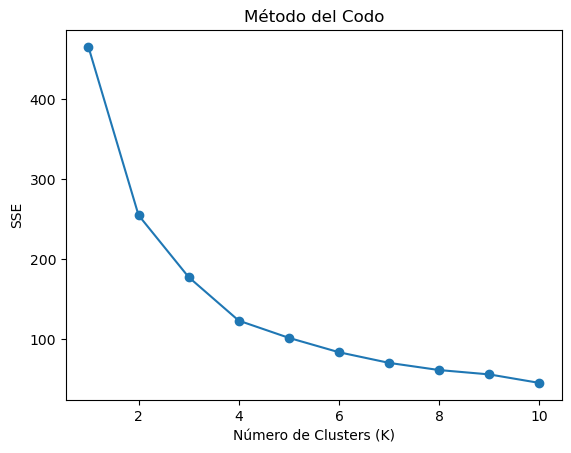

In [89]:
# Gráfico del método del codo
plt.plot(k_range, sse, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("SSE")
plt.title("Método del Codo")
plt.show()

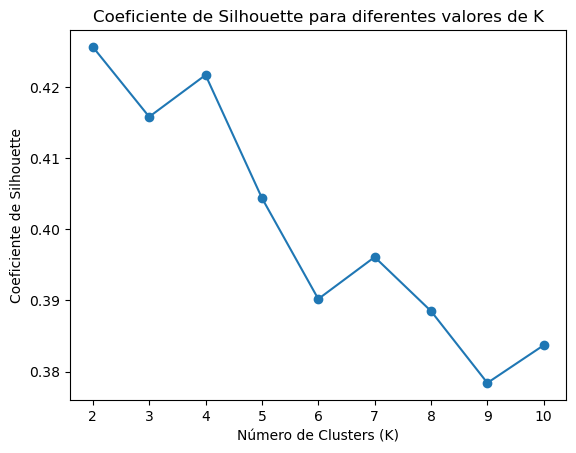

In [91]:
# Alternativamente, calcular el Coeficiente de Silhouette para evaluar el número óptimo de clusters
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Coeficiente de Silhouette para diferentes valores de K")
plt.show()

In [93]:
# Ajuste del Modelo
# Seleccionar un valor óptimo de K (por ejemplo, 3) y entrenar el modelo final
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df_pca)

In [95]:
# Evaluación del Modelo
# Coeficiente de Silhouette y Calinski-Harabasz
silhouette_avg = silhouette_score(df_pca, df['cluster'])
calinski_harabasz = calinski_harabasz_score(df_pca, df['cluster'])
print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhouette: 0.41580982650518195
Índice de Calinski-Harabasz: 159.95332488012548


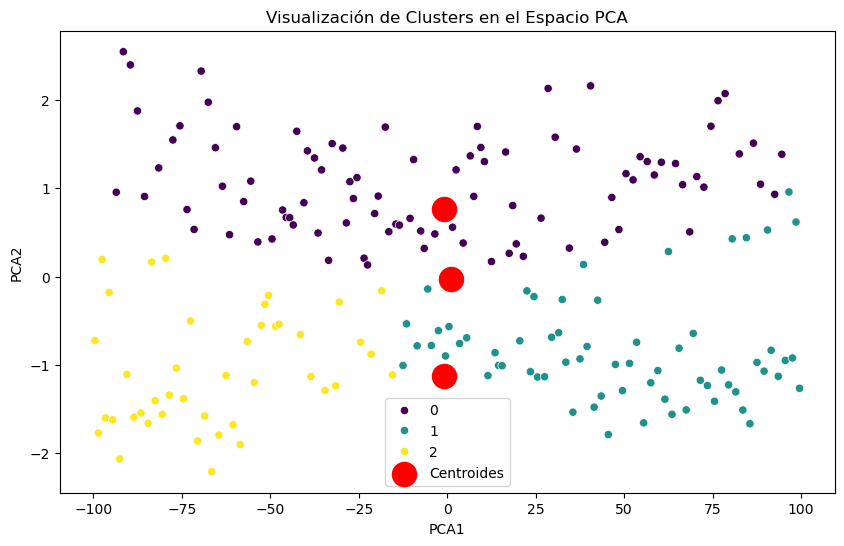

In [99]:
from sklearn.decomposition import PCA

# Supongamos que 'df' es el DataFrame original
# 1. Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['cluster']))  # Asegúrate de que 'cluster' no esté en el PCA

# 2. Crear las nuevas columnas PCA1 y PCA2
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Ahora deberías poder visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title("Visualización de Clusters en el Espacio PCA")
plt.legend()
plt.show()


In [117]:
# 2. Interpretación de los Centros de Clusters
# Definir X con tus datos (asegurándote de que 'data' es tu DataFrame original)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Ajustar el PCA con tus datos

# Invertir la transformación del PCA a las dimensiones originales
cluster_centers_original = pca.inverse_transform(cluster_centers_pca)

# Crear un DataFrame con los centros de los clusters en las dimensiones originales
cluster_centers = pd.DataFrame(cluster_centers_original, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Centros de Clusters:")
print(cluster_centers)





Centros de Clusters:
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.751072           -0.074180               -0.750701
1 -0.608900            0.803142                0.602927
2 -0.720742           -1.078702                0.729165


In [107]:
# Análisis e Interpretación de Resultados
# Documentar los resultados obtenidos para cada cluster
for i in range(optimal_k):
    print(f"\nCluster {i}")
    cluster_data = df[df['cluster'] == i]
    print(f"Promedio de Edad: {cluster_data['Age'].mean()}")
    print(f"Promedio de Ingresos Anuales: {cluster_data['Annual Income (k$)'].mean()}")
    print(f"Promedio de Puntaje de Gastos: {cluster_data['Spending Score (1-100)'].mean()}")
    print(f"Número de clientes en el cluster: {len(cluster_data)}")


Cluster 0
Promedio de Edad: 0.8403262013094319
Promedio de Ingresos Anuales: -0.07349872447398925
Promedio de Puntaje de Gastos: -0.6614693021880876
Número de clientes en el cluster: 93

Cluster 1
Promedio de Edad: -0.6163654540179089
Promedio de Ingresos Anuales: 0.8030847897740901
Promedio de Puntaje de Gastos: 0.5954630158368688
Número de clientes en el cluster: 65

Cluster 2
Promedio de Edad: -0.906823385966979
Promedio de Ingresos Anuales: -1.0801221418865448
Promedio de Puntaje de Gastos: 0.5431321208118013
Número de clientes en el cluster: 42
